In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
def toydata():
    # defining the mean 
    mu_a = -0.5
    mu_b = 0.5
    # defining the standard deviation  
    sigma_a = 2
    sigma_b = 2

    np.random.seed(0) 

    X_a = np.random.normal(mu_a, sigma_a, (395, 1)) 
    Y_a = np.random.normal(mu_a, sigma_a, (395, 1)) 
    
    np.random.seed(0) 

    X_b = np.random.normal(mu_b, sigma_b, (395, 1)) 
    Y_b = np.random.normal(mu_b, sigma_b, (395, 1)) 

    ax = plt.gca()
    ax.scatter(X_a, Y_a, color = 'b')
    ax.scatter(X_b, Y_b, color = 'r')

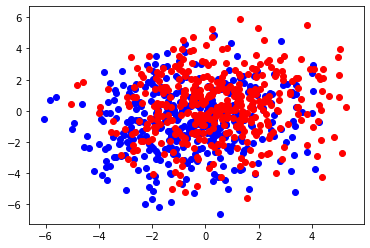

In [4]:
toydata()

In [5]:
data = pd.read_csv('hw3_data2.txt', sep=",", header=None)
data['y'] = data[0].apply(lambda x: 1 if x == '+' else -1)
data.head()

,0,1,2,y
0,+,1.607874,9.247557,1
1,+,3.003258,6.610258,1
2,+,4.069008,18.327280,1
3,+,0.407198,14.835517,1
4,+,13.747305,8.219991,1


In [6]:
X = data[[1,2]].to_numpy()
y = data['y'].to_numpy()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=12)

In [8]:
X_train, y_train

(array([[26.99226961,  7.11287221],
        [10.51907261,  0.89939238],
        [-7.07789376,  0.70636693],
        ...,
        [ 7.18513764,  0.16996943],
        [ 8.42542448, -1.78192295],
        [10.23141161,  7.20118397]]), array([-1,  1, -1, ...,  1,  1,  1]))

In [9]:
#source: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [10]:
clf = SVC(kernel='poly', degree=2, gamma=0.1)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

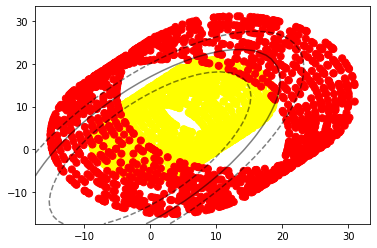

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

In [12]:
clf = SVC(kernel='rbf', C=1E6, gamma='auto')
clf.fit(X_train, y_train)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

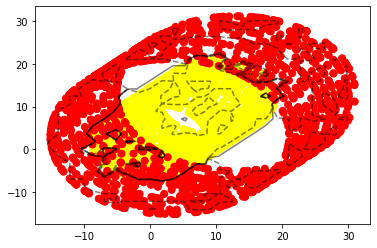

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

In [14]:
#rbf works best because the distribution is high dimensional. In other words, boundaries are hypothesized to be curve-shaped.

• Give three features that would allow you to distinguish between malign and benign tumors. Describe
shortly how to calculate them given the images in figure 1a and 1b, or segmented images. Describe
shortly why you chose these features.


Margin, Shape, Density would be great features that will distinguish between malign and benign tumors.
If margin and shape is closer to Oval(Circumscribed), we can give lower value(0), if the margin or shape is messy we can give higher value(1).
If density is low we can give lower value(0), if it is high, we can give higher value(1).
It is difficult to assign values to images but I agreed that I can see the difference between malign and benign tumors by margin, shape and density. I would not be sure if a program can classify well the margin and shape but I agree density will be measured well and help the classification much.

• Given these features design a classifier. Assume that the cost of misclassifying a malign tumor is 2
times the cost to misclassify a benign. Explain what other assumptions you are making (if any).

• We want to compare our computer aided diagnoses system with the performance achieved nowadays in
clinical practice by radiologists and a CAD system that is sold and available at the moment in the clinic.
The system at the clinic gives us as a result a probability that a tumor is malign. The comparison
is done using ROC curves. Three ROC curves which are shown in figure 2 are generated. ROC(1)
corresponds to the radiologist performance, ROC(2) corresponds to the already existing system and
ROC(3) corresponds to the system we just design.

– How could we generate ROC(1)? Describe the steps and the information that you need to gather
to obtain ROC(1).
To generate ROC (1), we need to get True Positive Rate (TPR) and False Positive Rate (FPR) according to the radiologist performance.

– How could we generate ROC(2) and ROC(3)? Describe the steps and the information that you
needed to gather to obtain ROC(2) and ROC(3).
To generate ROC (2) and ROC (3), we need to get True Positive Rate (TPR) and False Positive Rate (FPR) according to the system that already exists and the system we just designed.

– Given the ROC curves how can you compare the performance of the different systems?
Lowering the threshold diagnoses(classifies) more cases as positive. This will increase False Positives and True Positives.

– What can you say of the performance of the radiologists in comparison to the CAD systems?
– What can you say about the performance of the CAD systems in relation to each other?
ROC (1) is better in general because its AUC (area under curve) is the largest in comparison to two CAD systems.
ROC (1) is better than ROC (2) in every aspect.
However, ROC (3) has a slight advantage on sensitivity than ROC (1). This is less than the amount how ROC (1) has advantage on speicificity. Thus, ROC (1) is better than ROC (3).
The relation between ROC (2) and ROC (3) is similar to the above comparison between ROC (1) and ROC (3). However, ROC (2) is just a worse version of ROC (1).
    ROC (3) has a good amount of advantage on sensitivity than ROC (2). This is more than the amount how ROC (2) has advantage on speicificity. Thus, ROC (3) is better than ROC (2).

• Imagine that you find out looking at the feature space that each class seems to cluster in more than
one location in the feature space. Would that have influence in your choice of the classifier? Why?
If you would choose another classifier which one? Which assumptions are you making? Describe how
you would implement it? What are the disadvantages of this method compared to the one you already
had?

When data is highly clustered, in other words, imbalanced, PR(Precision Recall) Curve performs better than ROC curve.
Precision ( True Positives / (True Positives + False Positives) ) is more sensitive to False Positives and is less sensitive to a large total real negative denominator.
Assume our problem is a "searching needle in the haystack problem". In other words, we assume most of the tumors are benign (clustered and imbalanced) and we want to detect malignant tumors. In this case I would choose PR. PR focuses on detecting true positive. Also we are more interested in detecting true positive and diagnose that it is highly positive that a tumor is malignant. (if we want to detect benign, vise versa)